In [218]:
import pandas as pd

In [219]:
data = pd.read_csv('covid_19_data.csv', parse_dates = ['ObservationDate','Last Update'])

In [220]:
checkup=data.groupby(['Country/Region','Province/State','ObservationDate']).count().iloc[:,0]

In [221]:
checkup[checkup>1]

Country/Region  Province/State  ObservationDate
Mainland China  Gansu           2020-03-11         2
                                2020-03-12         2
                Hebei           2020-03-11         2
                                2020-03-12         2
Name: SNo, dtype: int64

In [222]:
data[data['Province/State'].isin(['Gansu','Hebei']) & data['ObservationDate'].isin(['2020-03-11','2020-03-12'])]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4748,4749,2020-03-11,Hebei,Mainland China,2020-03-11 02:18:14,318.0,6.0,307.0
4765,4766,2020-03-11,Gansu,Mainland China,2020-03-11 14:33:03,127.0,2.0,88.0
4925,4926,2020-03-11,Gansu,Mainland China,2020-03-11 02:18:28,0.0,0.0,0.0
4926,4927,2020-03-11,Hebei,Mainland China,2020-03-11 02:18:29,0.0,0.0,0.0
4965,4966,2020-03-12,Hebei,Mainland China,2020-03-12 05:33:02,318.0,6.0,308.0
4983,4984,2020-03-12,Gansu,Mainland China,2020-03-11 14:33:03,127.0,2.0,88.0
5146,5147,2020-03-12,Gansu,Mainland China,2020-03-11 02:18:28,0.0,0.0,0.0
5147,5148,2020-03-12,Hebei,Mainland China,2020-03-11 02:18:29,0.0,0.0,0.0


In [223]:
data=data.drop([4926,4925,5147,5146])

In [224]:
data.loc[data['Province/State']=='Macau','Country/Region']='Macau'

In [225]:
data.loc[data['Province/State']=='Hong Kong','Country/Region']='Hong Kong'

In [226]:
data=data.drop(['SNo','Last Update'],axis=1)

In [227]:
data=data.rename(columns={'Country/Region':'Country','ObservationDate':'Date'})

In [228]:
data.isnull().sum()

Date                 0
Province/State    3090
Country              0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [229]:
daily=data.sort_values(['Date','Country','Province/State'])

In [230]:
daily

,Date,Province/State,Country,Confirmed,Deaths,Recovered
12,2020-01-22,Hong Kong,Hong Kong,0.0,0.0,0.0
35,2020-01-22,NaN,Japan,2.0,0.0,0.0
20,2020-01-22,Macau,Macau,1.0,0.0,0.0
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
5,2020-01-22,Guangdong,Mainland China,26.0,0.0,0.0
6,2020-01-22,Guangxi,Mainland China,2.0,0.0,0.0


In [231]:
latest=daily[daily.Date==daily.Date.max()]

In [232]:
country=latest.groupby('Country').sum().sort_values(['Confirmed','Deaths'],ascending=[False,False])

In [233]:
country['Death Rate']=country['Deaths']/country['Confirmed']

In [234]:
country['Recovery Rate']=country['Recovered']/country['Confirmed']

In [239]:
country=country[country['Confirmed']>1000].sort_values(['Death Rate'],ascending=False).sort_values(['Death Rate','Confirmed'],ascending=False).sort_values('Confirmed',ascending=False).loc[(['US','Italy','South Korea','Mainland China'])]
populations=pd.Series({'Italy':60480086,'Mainland China':1437797823,'South Korea':51257113,'US':329420235},name='Population')

country_1=country.join(populations)

country_1['Confirmed Population']=country_1.Confirmed/country_1.Population
country_1

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Population,Confirmed Population
Country,,,,,,,
US,19101.0,244.0,147.0,0.012774,0.007696,329420235,0.000058
Italy,47021.0,4032.0,4440.0,0.085749,0.094426,60480086,0.000777
South Korea,8652.0,94.0,1540.0,0.010865,0.177994,51257113,0.000169
Mainland China,80977.0,3249.0,71158.0,0.040123,0.878743,1437797823,0.000056


In [246]:
hist=daily.groupby(['Country','Date']).Confirmed.sum().loc[(['US','Italy','South Korea','Mainland China'])].unstack(level=0)
populations=pd.Series({'Italy':60480086,'Mainland China':1437797823,'South Korea':51257113,'US':329420235},name='Population')
hist['Mainland China Pop']= hist['Mainland China']/populations.loc['Mainland China']
hist['Italy Pop']=hist['Italy']/populations.loc['Italy']
hist['US Pop']=hist['US']/populations.loc['US']
hist['South Korea Pop']=hist['South Korea']/populations.loc['South Korea']
hist

Country,Italy,Mainland China,South Korea,US,Mainland China Pop,Italy Pop,US Pop,South Korea Pop
Date,,,,,,,,
2020-01-22,NaN,547.0,1.0,1.0,3.804429e-07,NaN,3.035636e-09,1.950949e-08
2020-01-23,NaN,639.0,1.0,1.0,4.444297e-07,NaN,3.035636e-09,1.950949e-08
2020-01-24,NaN,916.0,2.0,2.0,6.370854e-07,NaN,6.071272e-09,3.901897e-08
2020-01-25,NaN,1399.0,2.0,2.0,9.730158e-07,NaN,6.071272e-09,3.901897e-08
2020-01-26,NaN,2062.0,3.0,5.0,1.434138e-06,NaN,1.517818e-08,5.852846e-08
2020-01-27,NaN,2863.0,4.0,5.0,1.991240e-06,NaN,1.517818e-08,7.803795e-08
2020-01-28,NaN,5494.0,4.0,5.0,3.821121e-06,NaN,1.517818e-08,7.803795e-08
2020-01-29,NaN,6070.0,4.0,5.0,4.221734e-06,NaN,1.517818e-08,7.803795e-08
2020-01-30,NaN,8124.0,4.0,5.0,5.650308e-06,NaN,1.517818e-08,7.803795e-08


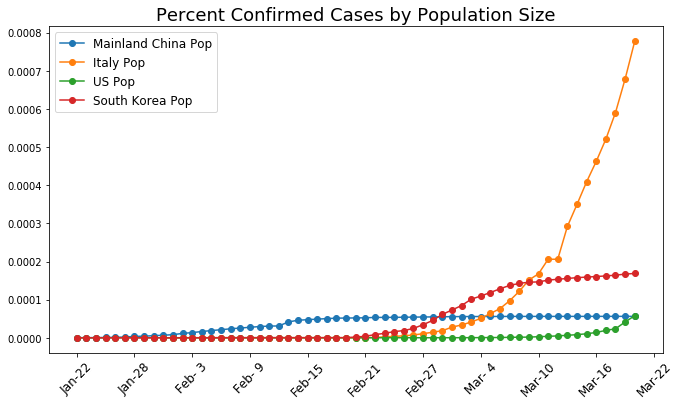

In [256]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b-%e')

confirm=hist[['Mainland China Pop','Italy Pop','US Pop','South Korea Pop']]

fig,ax=plt.subplots(figsize=(11,6))
ax.plot(confirm,marker='o')

plt.title('Percent Confirmed Cases by Population Size',fontdict={'fontsize':18})
ax.legend(confirm.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45, fontsize=12)
plt.show()

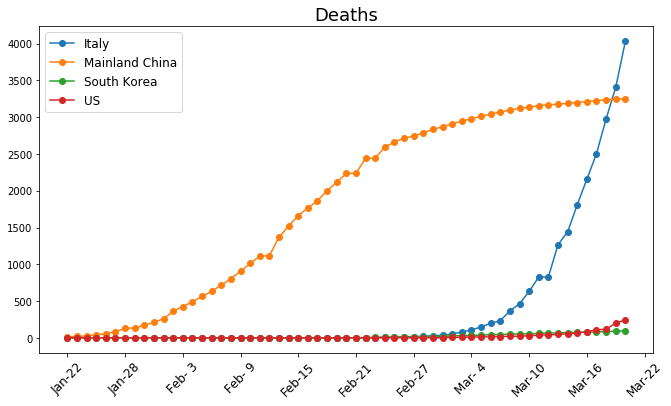

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b-%e')


death=daily.groupby(['Country','Date']).Deaths.sum().loc[(['US','Italy','South Korea','Mainland China'])].unstack(level=0)

fig,ax=plt.subplots(figsize=(11,6))
ax.plot(death,marker='o')

plt.title('Deaths',fontdict={'fontsize':18})
ax.legend(death.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45, fontsize=12)
plt.show()

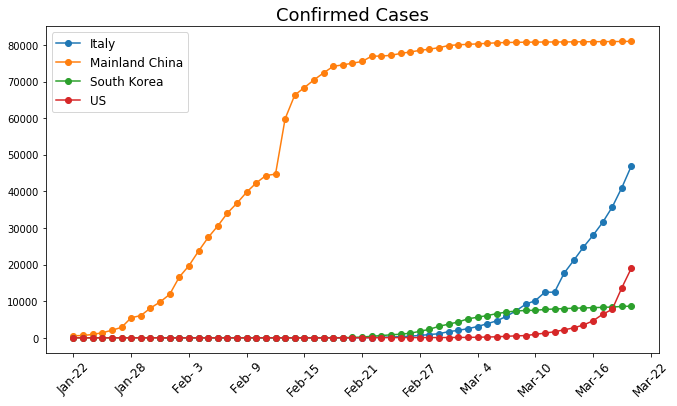

In [260]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b-%e')


confirmed=daily.groupby(['Country','Date']).Confirmed.sum().loc[(['US','Italy','South Korea','Mainland China'])].unstack(level=0)

fig,ax=plt.subplots(figsize=(11,6))
ax.plot(death,marker='o')

plt.title('Confirmed Cases',fontdict={'fontsize':18})
ax.legend(confirmed.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [261]:
import datetime as dt

states=daily.groupby(['Country','Province/State','Date']).Confirmed.sum().loc['US',['Washington','New York','California','Texas']].unstack(level=1).reset_index().set_index('Date').drop(columns='Country').sort_index()
states.loc[states.index>dt.datetime.today()-dt.timedelta(days=7)]

Province/State,California,New York,Texas,Washington
Date,,,,
2020-03-16,557.0,967.0,85.0,904.0
2020-03-17,698.0,1706.0,110.0,1076.0
2020-03-18,751.0,2495.0,173.0,1014.0
2020-03-19,952.0,5365.0,260.0,1376.0
2020-03-20,1177.0,8310.0,394.0,1524.0


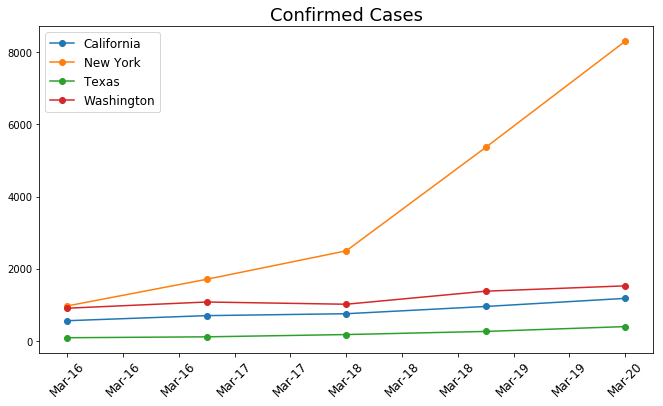

In [262]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b-%e')


confirm=states.loc[states.index>dt.datetime.today()-dt.timedelta(days=7)]
fig,ax=plt.subplots(figsize=(11,6))
ax.plot(confirm,marker='o')

plt.title('Confirmed Cases',fontdict={'fontsize':18})
ax.legend(confirm.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45, fontsize=12)
plt.show()